# Achraf Safsafi {-}
# DSC650 {-}
# Assignment 6 {-}

# {-}




# Assignment 6.1 : {-}

#### Instantiating a small convnet {-}
#### The model definition {-}

In [1]:
import warnings
warnings.filterwarnings("ignore")

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

#### Training the convnet on MNIST images  {-}

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

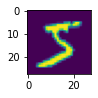

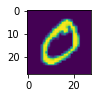

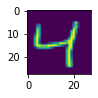

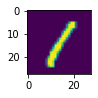

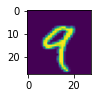

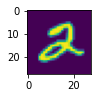

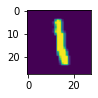

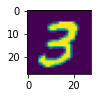

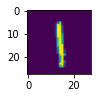

In [3]:
from matplotlib import pyplot

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_images[i])
    pyplot.show()

In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 16s 16ms/step - loss: 0.3995 - accuracy: 0.8737 - val_loss: 0.0416 - val_accuracy: 0.9856
Epoch 2/5
938/938 [==============================] - 14s 14ms/step - loss: 0.0538 - accuracy: 0.9822 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0271 - val_accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0340 - val_accuracy: 0.9905


#### Saving the model {-}

In [5]:
model.save('my_model_MNIST.h5')

In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss {-}

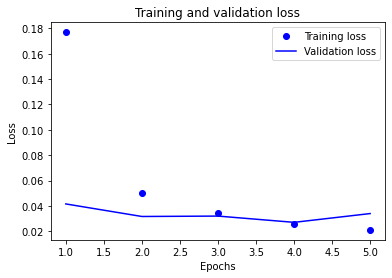

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy {-}

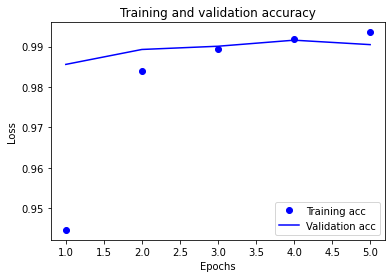

In [8]:
plt.clf()  
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0340 - accuracy: 0.9905


In [10]:
test_loss

0.034013763070106506

In [11]:
test_acc

0.9904999732971191

## Using a trained network to generate predictions on new data {-}

In [12]:
predictions = model.predict(test_images)
predictions

array([[2.57292715e-10, 3.30268479e-09, 1.31545805e-08, ...,
        1.00000000e+00, 2.70648925e-09, 2.91721349e-08],
       [1.57501938e-06, 1.32001574e-07, 9.99998331e-01, ...,
        1.36899884e-11, 2.23281602e-10, 2.09971878e-13],
       [9.15580056e-09, 9.99992847e-01, 4.73478217e-08, ...,
        7.63992603e-07, 2.46768167e-07, 1.12914279e-07],
       ...,
       [2.30144696e-15, 1.23220795e-10, 1.18460840e-12, ...,
        8.22152589e-12, 2.47006625e-12, 7.60371988e-10],
       [1.12810064e-08, 1.40128664e-09, 2.90594892e-11, ...,
        2.57040778e-10, 3.17143895e-05, 2.23177636e-08],
       [4.43960053e-05, 1.67791583e-07, 7.25055997e-08, ...,
        1.02242442e-11, 1.80049039e-06, 4.92034246e-07]], dtype=float32)

# {-}





# Assignment 6.2 : {-}

## Assignment 6.2.A : {-}

#### The model definition {-}

In [13]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


#### Training the convnet on CIFAR10 images {-}

In [14]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((50000,32,32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,32,32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

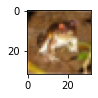

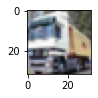

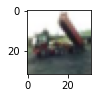

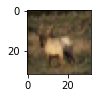

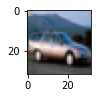

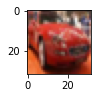

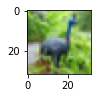

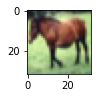

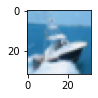

In [15]:

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_images[i])
    pyplot.show()

In [16]:

model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=100, batch_size=64,
                    validation_data= (test_images,test_labels))

Epoch 1/100
782/782 [==============================] - 39s 49ms/step - loss: 1.7857 - acc: 0.3325 - val_loss: 1.1783 - val_acc: 0.5765
Epoch 2/100
782/782 [==============================] - 39s 50ms/step - loss: 1.0540 - acc: 0.6242 - val_loss: 0.8873 - val_acc: 0.6885
Epoch 3/100
782/782 [==============================] - 38s 49ms/step - loss: 0.8031 - acc: 0.7192 - val_loss: 0.8202 - val_acc: 0.7216
Epoch 4/100
782/782 [==============================] - 38s 49ms/step - loss: 0.6617 - acc: 0.7679 - val_loss: 0.7497 - val_acc: 0.7409
Epoch 5/100
782/782 [==============================] - 38s 48ms/step - loss: 0.5502 - acc: 0.8065 - val_loss: 0.7326 - val_acc: 0.7527
Epoch 6/100
782/782 [==============================] - 38s 49ms/step - loss: 0.4465 - acc: 0.8409 - val_loss: 0.7185 - val_acc: 0.7641
Epoch 7/100
782/782 [==============================] - 38s 49ms/step - loss: 0.3662 - acc: 0.8708 - val_loss: 0.7162 - val_acc: 0.7785
Epoch 8/100
782/782 [==============================] - 

#### Saving the model {-}

model.save('my_model_CIFAR10_small_1.h5')

#### Plotting the training and validation loss {-}

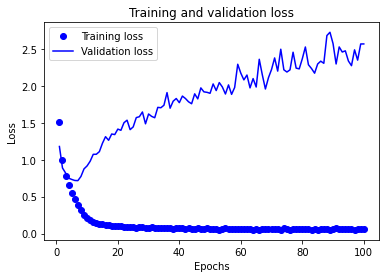

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy {-}

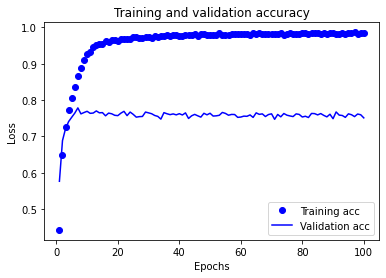

In [18]:
plt.clf()  
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 2.5664 - acc: 0.7510


In [20]:
test_loss

2.5664284229278564

In [21]:
test_acc

0.7509999871253967

#### Using a trained network to generate predictions on new data {-}

In [22]:
model.predict(test_images)

array([[9.83122349e-31, 0.00000000e+00, 3.76410218e-19, ...,
        2.70899174e-25, 1.25453624e-34, 3.51887146e-22],
       [3.51257949e-24, 9.70938974e-09, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 4.83174063e-15],
       [2.43231189e-02, 8.85393694e-02, 2.66787225e-07, ...,
        2.71037798e-02, 6.86487317e-01, 1.72860682e-01],
       ...,
       [2.56901842e-29, 2.14824327e-26, 8.73304204e-16, ...,
        2.02863690e-28, 2.73567756e-28, 1.81814868e-33],
       [2.34243433e-26, 1.00000000e+00, 3.03080940e-22, ...,
        2.24590593e-22, 1.26092505e-23, 1.98170875e-16],
       [0.00000000e+00, 0.00000000e+00, 4.74353939e-34, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

# {-}


## Assignment 6.2.B : {-}

#### Defining a new convnet that includes dropout {-}

In [23]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))



model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

#### Training the convnet using data-augmentation generators {-}

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

train_datagen.fit(train_images)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=64,shuffle=False)

history = model.fit_generator(train_generator,    
                    validation_data=(test_images,test_labels),
                    epochs=100)

Epoch 1/100
782/782 [==============================] - 52s 66ms/step - loss: 1.9380 - acc: 0.2705 - val_loss: 1.3633 - val_acc: 0.5061
Epoch 2/100
782/782 [==============================] - 51s 66ms/step - loss: 1.4272 - acc: 0.4771 - val_loss: 1.1614 - val_acc: 0.5886
Epoch 3/100
782/782 [==============================] - 52s 66ms/step - loss: 1.2321 - acc: 0.5569 - val_loss: 1.0104 - val_acc: 0.6405
Epoch 4/100
782/782 [==============================] - 51s 66ms/step - loss: 1.1325 - acc: 0.5990 - val_loss: 0.9315 - val_acc: 0.6764
Epoch 5/100
782/782 [==============================] - 51s 66ms/step - loss: 1.0405 - acc: 0.6357 - val_loss: 0.8756 - val_acc: 0.6861
Epoch 6/100
782/782 [==============================] - 51s 66ms/step - loss: 0.9894 - acc: 0.6508 - val_loss: 0.8638 - val_acc: 0.6903
Epoch 7/100
782/782 [==============================] - 52s 66ms/step - loss: 0.9393 - acc: 0.6672 - val_loss: 0.7676 - val_acc: 0.7290
Epoch 8/100
782/782 [==============================] - 

#### Saving the model {-}

In [25]:
model.save('my_model_CIFAR10_small_2.h5')

#### Plotting the training and validation loss {-}

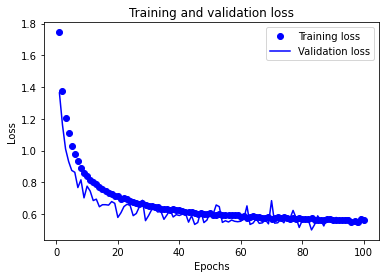

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting the training and validation accuracy {-}

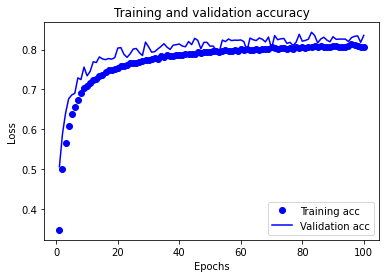

In [27]:
plt.clf()  
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 0.5471 - acc: 0.8357


In [29]:
test_loss

0.5471076369285583

In [30]:
test_acc

0.8356999754905701

## Using a trained network to generate predictions on new data {-}

In [31]:
predictions = model.predict(test_images)
predictions

array([[6.7784073e-04, 2.0172952e-01, 7.6297566e-04, ..., 9.3408256e-05,
        2.6527985e-03, 2.1847911e-02],
       [4.4862385e-04, 8.0999220e-03, 1.1174266e-08, ..., 4.3679316e-10,
        9.9143094e-01, 2.0585567e-05],
       [1.4015803e-02, 5.9949052e-01, 1.7706062e-06, ..., 8.8142161e-07,
        3.8515681e-01, 1.3236572e-03],
       ...,
       [2.4974351e-09, 2.6904849e-09, 6.7537404e-03, ..., 3.4844122e-06,
        1.5670787e-07, 1.5309867e-10],
       [9.8884572e-09, 9.9999845e-01, 7.4739893e-12, ..., 9.6070970e-13,
        5.2394855e-12, 1.5896888e-06],
       [6.5965121e-19, 2.2851819e-24, 2.7912929e-14, ..., 9.9999988e-01,
        1.2999737e-23, 1.1006550e-22]], dtype=float32)

# {-}




# Assignment 6.3 : {-}

#### load the dataset {-}

In [32]:

from tensorflow.keras.preprocessing import image

In [33]:
images_paths = ['anders-thomasson-scZEblckRmM-unsplash.jpg','dan-kb-UdxJSRD6UNM-unsplash.jpg',
               'francois-dallay-nB3GP4y2dlw-unsplash.jpg','pedram-normohamadian-ts26KpllwY0-unsplash.jpg',
               'zetong-li-mVqTumQH-c0-unsplash.jpg']

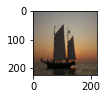

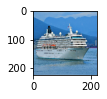

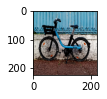

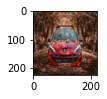

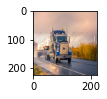

In [34]:
from matplotlib import pyplot

for i in range(5):
    img = image.load_img(images_paths[i], target_size=(224,224))
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(img)
    pyplot.show()

#### Make predictions using the ResNet-50 {-}

In [35]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds)[0])

Predicted: [('n04467665', 'trailer_truck', 0.9343032), ('n03417042', 'garbage_truck', 0.034359016), ('n04252225', 'snowplow', 0.009116761), ('n04461696', 'tow_truck', 0.006997567), ('n04146614', 'school_bus', 0.0062897047)]
